# Capstone Project - Car Accidents

This project is Supervised achine Learning project to find out the factors most influential of car accidents

## Data Understanding
### Imported dataset and had a high-level view of the dataframe, columns, datatypes, null values, & counts of target variable Severity Code

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import the csv file
input_file = "Data-Collisions.csv"
Data_Collisions = pd.read_csv(input_file)

c:\users\chait\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Data_Collisions.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
Data_Collisions.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
Data_Collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
Data_Collisions.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [7]:
Data_Collisions['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

## Data Preparation
### 1. Dropped Columns which donot help the analysis, which are coordinates, IDs, have too many null values, duplicates, Text Desciptions, Columns which are undscribes and donot have more than 1 category are eliminated
### 2. Removed null values
### 3. Categorized columns into numerical values
### 4. Changed Data Types
### 5. Balanced the dataset using SNOTE Technique & Spitt he dataset into Training & Testing

In [8]:
New_Collisions = Data_Collisions.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO', 'INCDTTM',
                                       'STATUS','INTKEY', 'LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC',
                                       'SEVERITYCODE.1','SEVERITYDESC','INCDATE','SDOT_COLDESC',
                                       'INATTENTIONIND','PEDROWNOTGRNT', 'SDOTCOLNUM','SPEEDING',
                                       'ST_COLDESC', 'SEGLANEKEY','CROSSWALKKEY'], axis=1)

In [9]:
New_Collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   194673 non-null  int64 
 1   ADDRTYPE       192747 non-null  object
 2   COLLISIONTYPE  189769 non-null  object
 3   PERSONCOUNT    194673 non-null  int64 
 4   PEDCOUNT       194673 non-null  int64 
 5   PEDCYLCOUNT    194673 non-null  int64 
 6   VEHCOUNT       194673 non-null  int64 
 7   JUNCTIONTYPE   188344 non-null  object
 8   SDOT_COLCODE   194673 non-null  int64 
 9   UNDERINFL      189789 non-null  object
 10  WEATHER        189592 non-null  object
 11  ROADCOND       189661 non-null  object
 12  LIGHTCOND      189503 non-null  object
 13  ST_COLCODE     194655 non-null  object
 14  HITPARKEDCAR   194673 non-null  object
dtypes: int64(6), object(9)
memory usage: 22.3+ MB


In [10]:
New_Collisions.isnull().sum()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
SDOT_COLCODE        0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
HITPARKEDCAR        0
dtype: int64

In [11]:
New_Collisions1 = New_Collisions.dropna(subset=['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE',
                                               'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE'])

In [12]:
New_Collisions1.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
SDOT_COLCODE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
HITPARKEDCAR     0
dtype: int64

In [13]:
New_Collisions1.head(5)

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


In [14]:
New_Collisions1['ADDRTYPE'].value_counts()

Block           119362
Intersection     63298
Alley              235
Name: ADDRTYPE, dtype: int64

In [15]:
New_Collisions1['COLLISIONTYPE'].value_counts()

Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestrian     6513
Cycles         5362
Right Turn     2929
Head On        1996
Name: COLLISIONTYPE, dtype: int64

In [16]:
New_Collisions1['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              86609
At Intersection (intersection related)               61206
Mid-Block (but intersection related)                 22341
Driveway Junction                                    10519
At Intersection (but not related to intersection)     2055
Ramp Junction                                          160
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

In [17]:
New_Collisions1['UNDERINFL'].value_counts()

N    94956
0    78942
Y     5020
1     3977
Name: UNDERINFL, dtype: int64

In [18]:
New_Collisions1['WEATHER'].value_counts()

Clear                       109059
Raining                      32642
Overcast                     27183
Unknown                      11637
Snowing                        881
Other                          746
Fog/Smog/Smoke                 556
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [19]:
New_Collisions1['ROADCOND'].value_counts()

Dry               122153
Wet                46710
Unknown            11519
Ice                 1177
Snow/Slush           978
Other                123
Standing Water       108
Sand/Mud/Dirt         67
Oil                   60
Name: ROADCOND, dtype: int64

In [20]:
New_Collisions1['LIGHTCOND'].value_counts()

Daylight                    113837
Dark - Street Lights On      47547
Unknown                      10448
Dusk                          5771
Dawn                          2453
Dark - No Street Lights       1461
Dark - Street Lights Off      1157
Other                          210
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [21]:
New_Collisions1['HITPARKEDCAR'].value_counts()

N    177205
Y      5690
Name: HITPARKEDCAR, dtype: int64

In [22]:
Cleanup = {"ADDRTYPE":      {"Block": 1, "Intersection": 2, "Alley": 3},
           "COLLISIONTYPE": {"Parked Car": 1, "Angles": 2, "Rear Ended": 3, "Other": 4, 
                             "Sideswipe": 5, "Left Turn": 6, "Pedestrian": 7, "Cycles": 8, "Right Turn": 9, "Head On": 10},
           "JUNCTIONTYPE":  {"Mid-Block (not related to intersection)": 1, "At Intersection (intersection related)": 2, 
                             "Mid-Block (but intersection related)": 3, "Driveway Junction": 4, 
                             "At Intersection (but not related to intersection)": 5, "Ramp Junction": 6, "Unknown": 7},
           "UNDERINFL":     {"Y": 1, "N":0},
           "WEATHER":       {"Clear": 1, "Raining": 2, "Overcast": 3, "Unknown": 4, "Snowing": 5, "Other": 6, 
                             "Fog/Smog/Smoke": 7, "Sleet/Hail/Freezing Rain": 8, "Blowing Sand/Dirt": 9, 
                             "Severe Crosswind": 10, "Partly Cloudy": 11},
           "ROADCOND":      {"Dry": 1, "Wet": 2, "Unknown": 3, "Ice": 4, "Snow/Slush": 5, "Other": 6, "Standing Water": 7, 
                             "Sand/Mud/Dirt": 8, "Oil":9},
           "LIGHTCOND":     {"Daylight": 1, "Dark - Street Lights On": 2, "Unknown": 3, "Dusk": 4, "Dawn": 5, 
                             "Dark - No Street Lights": 6, "Dark - Street Lights Off": 7, "Other": 8, 
                             "Dark - Unknown Lighting": 9},
           "HITPARKEDCAR":  {"Y": 1, "N":0}}

In [23]:
New_Collisions1.replace(Cleanup, inplace=True)
New_Collisions1.head(5)

c:\users\chait\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,2,2,2,0,0,2,2,11,0,3,2,1,10,0
1,1,1,5,2,0,0,2,1,16,0,2,2,2,11,0
2,1,1,1,4,0,0,3,1,14,0,3,1,1,32,0
3,1,1,4,3,0,0,3,1,11,0,1,1,1,23,0
4,2,2,2,2,0,0,2,2,11,0,2,2,1,10,0


In [24]:
New_Collisions1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182895 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   182895 non-null  int64 
 1   ADDRTYPE       182895 non-null  int64 
 2   COLLISIONTYPE  182895 non-null  int64 
 3   PERSONCOUNT    182895 non-null  int64 
 4   PEDCOUNT       182895 non-null  int64 
 5   PEDCYLCOUNT    182895 non-null  int64 
 6   VEHCOUNT       182895 non-null  int64 
 7   JUNCTIONTYPE   182895 non-null  int64 
 8   SDOT_COLCODE   182895 non-null  int64 
 9   UNDERINFL      182895 non-null  object
 10  WEATHER        182895 non-null  int64 
 11  ROADCOND       182895 non-null  int64 
 12  LIGHTCOND      182895 non-null  int64 
 13  ST_COLCODE     182895 non-null  object
 14  HITPARKEDCAR   182895 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 22.3+ MB


In [25]:
New_Collisions1['UNDERINFL'] = np.int64(New_Collisions1['UNDERINFL'])
New_Collisions1['ST_COLCODE'] = np.int64(New_Collisions1['ST_COLCODE'])

<ipython-input-25-be07e8b5e869>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Collisions1['UNDERINFL'] = np.int64(New_Collisions1['UNDERINFL'])
<ipython-input-25-be07e8b5e869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Collisions1['ST_COLCODE'] = np.int64(New_Collisions1['ST_COLCODE'])


In [26]:
New_Collisions1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182895 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   SEVERITYCODE   182895 non-null  int64
 1   ADDRTYPE       182895 non-null  int64
 2   COLLISIONTYPE  182895 non-null  int64
 3   PERSONCOUNT    182895 non-null  int64
 4   PEDCOUNT       182895 non-null  int64
 5   PEDCYLCOUNT    182895 non-null  int64
 6   VEHCOUNT       182895 non-null  int64
 7   JUNCTIONTYPE   182895 non-null  int64
 8   SDOT_COLCODE   182895 non-null  int64
 9   UNDERINFL      182895 non-null  int64
 10  WEATHER        182895 non-null  int64
 11  ROADCOND       182895 non-null  int64
 12  LIGHTCOND      182895 non-null  int64
 13  ST_COLCODE     182895 non-null  int64
 14  HITPARKEDCAR   182895 non-null  int64
dtypes: int64(15)
memory usage: 22.3 MB


In [27]:
features = New_Collisions1.drop(['SEVERITYCODE'], axis=1)

In [28]:
features.corr()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
ADDRTYPE,1.000000,0.211776,0.056686,0.145445,0.082704,-0.095072,0.226536,-0.071258,-0.046892,-0.071582,-0.077608,-0.064258,-0.194237,-0.119919
COLLISIONTYPE,0.211776,1.000000,0.002673,0.313702,0.372841,-0.331278,0.139857,0.301871,-0.011129,-0.103638,-0.096277,-0.088450,-0.007274,-0.183681
PERSONCOUNT,0.056686,0.002673,1.000000,-0.027211,-0.042725,0.399674,0.055472,-0.168948,0.018792,-0.055842,-0.055682,-0.047089,-0.209080,-0.046242
PEDCOUNT,0.145445,0.313702,-0.027211,1.000000,-0.018662,-0.317361,0.018081,0.274884,0.014719,-0.013685,-0.010833,0.003564,-0.264272,-0.032722
PEDCYLCOUNT,0.082704,0.372841,-0.042725,-0.018662,1.000000,-0.307314,0.036734,0.407915,-0.018492,-0.041459,-0.048844,-0.024753,0.202760,-0.028242
VEHCOUNT,-0.095072,-0.331278,0.399674,-0.317361,-0.307314,1.000000,-0.022986,-0.495222,-0.011219,-0.010128,-0.023759,-0.029270,-0.238594,0.071872
JUNCTIONTYPE,0.226536,0.139857,0.055472,0.018081,0.036734,-0.022986,1.000000,-0.037501,-0.036587,-0.055717,-0.069881,-0.079520,-0.140093,-0.112266
SDOT_COLCODE,-0.071258,0.301871,-0.168948,0.274884,0.407915,-0.495222,-0.037501,1.000000,0.104003,-0.043033,-0.018387,0.023679,0.336412,-0.065964
UNDERINFL,-0.046892,-0.011129,0.018792,0.014719,-0.018492,-0.011219,-0.036587,0.104003,1.000000,-0.033864,-0.029778,0.087527,0.096869,0.018799
WEATHER,-0.071582,-0.103638,-0.055842,-0.013685,-0.041459,-0.010128,-0.055717,-0.043033,-0.033864,1.000000,0.597986,0.219249,0.071607,0.037315


<AxesSubplot:>

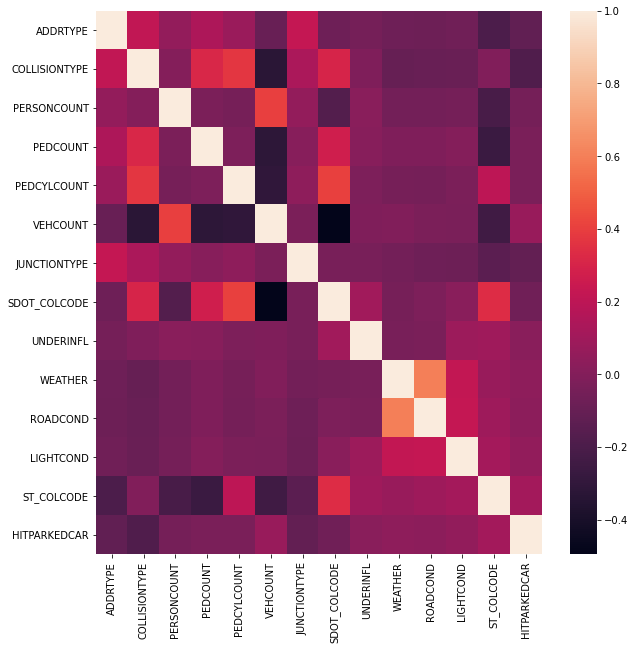

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize= (10, 10))
sns.heatmap(features.corr())

### All the columns have a correlation less than 0.6 which is a good sign that the data is not multicollinear.

In [30]:
# Balancing the data with SMOTE Technique, Splitting the Training & Test Data

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

y = New_Collisions1['SEVERITYCODE']
X = New_Collisions1.drop('SEVERITYCODE', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

## Preliminary Modelling
### Modelled the data using Decision Tree, Random Forest, Naive Bayes, KNN Neighbors

In [31]:
#Decision Tree technique
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_predict = DT_model.predict(X_test)
print(confusion_matrix(y_test, y_predict))
Decision_Tree_Accuracy_without_PCA = accuracy_score(y_test, y_predict)*100
print("Decision Tree's Accuracy score:", Decision_Tree_Accuracy_without_PCA)

[[20111 11410]
 [ 3634 10569]]
Decision Tree's Accuracy score: 67.09824162365497


In [32]:
#Random Forest technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_predict = RF_model.predict(X_test)
print(confusion_matrix(y_test, y_predict))
Random_Forest_without_PCA = accuracy_score(y_test, y_predict)*100
print("Random Forest's Accuracy score:",Random_Forest_without_PCA)

[[20091 11430]
 [ 3370 10833]]
Random Forest's Accuracy score: 67.63187822587699


In [33]:
# Naïve Bayes Classifiers
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb = gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)
print(confusion_matrix(y_test, y_predict))
Naïve_Bayes_without_PCA = accuracy_score(y_test, y_predict)*100
print("Naive Bayes Classifiers's Accuracy score:", Naïve_Bayes_without_PCA)

[[28501  3020]
 [10075  4128]]
Naive Bayes Classifiers's Accuracy score: 71.36077333566617


In [34]:
#KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier 
KNN_model = KNeighborsClassifier(n_neighbors=21) 
KNN_model.fit(X_train, y_train)
y_predict = KNN_model.predict(X_test)
print(confusion_matrix(y_test, y_predict))
KNN_Neighbors_without_PCA = accuracy_score(y_test, y_predict)*100
print("KNN Neighbors Accuracy score:", KNN_Neighbors_without_PCA)

[[25314  6207]
 [ 6718  7485]]
KNN Neighbors Accuracy score: 71.73256932901758


In [35]:
print("Decision Tree's Accuracy score:", round(Decision_Tree_Accuracy_without_PCA, 2))
print("Random Forest's Accuracy score:", round(Random_Forest_without_PCA, 2))
print("Naive Bayes Classifiers's Accuracy score:", round(Naïve_Bayes_without_PCA, 2))
print("KNN Neighbors Accuracy score:", round(KNN_Neighbors_without_PCA, 2))

Decision Tree's Accuracy score: 67.1
Random Forest's Accuracy score: 67.63
Naive Bayes Classifiers's Accuracy score: 71.36
KNN Neighbors Accuracy score: 71.73


### Principal Component Analysis

In [36]:
# Normalize the data
from sklearn.preprocessing import scale 
pca_x = scale(X)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
reduced = pca.fit(pca_x)

In [38]:
reduced.components_

array([[ 1.06051989e-01,  4.11925187e-01, -2.19635407e-01,
         2.66853186e-01,  3.88328497e-01, -4.99483495e-01,
         5.15813166e-02,  4.85709082e-01,  3.87710009e-02,
        -7.59201393e-02, -6.48645325e-02, -2.06306848e-02,
         1.93914122e-01, -1.06116801e-01],
       [ 3.18791476e-01,  2.14744055e-01,  2.45272022e-01,
         1.52112657e-01, -1.48812135e-02,  1.16187316e-01,
         2.71459872e-01, -1.37001070e-01, -7.63860636e-02,
        -4.19377925e-01, -4.30741968e-01, -3.20363514e-01,
        -3.94617283e-01, -1.92802396e-01],
       [ 3.14568389e-01,  1.63141025e-01,  7.39977792e-02,
         3.47001104e-01, -1.02952599e-01, -6.22586201e-02,
         2.14719249e-01, -1.11837327e-01, -1.55290506e-01,
         4.80250089e-01,  4.71015581e-01,  1.85810403e-01,
        -3.54589036e-01, -1.96441143e-01],
       [-1.50702785e-01, -1.06054347e-01, -1.86601388e-01,
         5.99463882e-01, -4.32174457e-01, -1.37512055e-01,
        -3.47274206e-01,  5.50396933e-02,  2.

In [39]:
reduced.explained_variance_ratio_

array([0.17603498, 0.14489198, 0.10777555, 0.08147445, 0.07689367,
       0.06957225, 0.06590487, 0.05855866, 0.05441824, 0.0440079 ,
       0.03949239, 0.02867866, 0.02853283])

### After performing PCA, the number of features reduced from 14 to 13 which show 95% variance.

In [40]:
New_feats = reduced.fit_transform(pca_x)
New_feats

array([[-0.70778162,  0.0726789 ,  1.54783175, ...,  0.71861569,
        -0.15590806, -0.15925535],
       [ 0.03003836, -0.62654191,  0.51326665, ..., -0.34199359,
         0.49270491,  0.04118282],
       [-1.77675342, -0.48659257, -0.64141515, ...,  0.33974052,
        -0.84092201, -1.29092349],
       ...,
       [ 0.36754178,  1.52972239, -0.06615608, ..., -1.15145876,
         0.00923953,  0.00682073],
       [ 6.69193838,  0.12102588, -0.05754129, ...,  3.33371847,
         1.01986797, -1.07779799],
       [-0.37290664, -0.17083149, -0.30009927, ...,  0.14341261,
         0.93414209,  0.52879858]])

In [41]:
from sklearn.model_selection import train_test_split
y = New_Collisions1['SEVERITYCODE']
X = New_feats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=12345)

In [42]:
#Decision Tree technique
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
PCA_DT_model = tree.DecisionTreeClassifier()
PCA_DT_model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_predict = PCA_DT_model.predict(X_test)
print(confusion_matrix(y_test, y_predict))
Decision_Tree_with_PCA = accuracy_score(y_test, y_predict)*100
print("Decision Tree's Accuracy score after PCA:", Decision_Tree_with_PCA)

[[28407  3017]
 [ 9072  5228]]
Decision Tree's Accuracy score after PCA: 73.56093080220452


In [43]:
#Random Forest technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
PCA_RF_model = RandomForestClassifier()
PCA_RF_model.fit(X_train, y_train)
y_predict = PCA_RF_model.predict(X_test)
print(confusion_matrix(y_test, y_predict))
Random_Forest_with_PCA = accuracy_score(y_test, y_predict)*100
print("Random Forest's Accuracy score after PCA:",Random_Forest_with_PCA)

[[28505  2919]
 [ 8946  5354]]
Random Forest's Accuracy score after PCA: 74.0508266993264


In [44]:
# Naïve Bayes Classifiers
from sklearn.naive_bayes import GaussianNB 
PCA_gnb = GaussianNB() 
PCA_gnb = PCA_gnb.fit(X_train, y_train)
y_predict = PCA_gnb.predict(X_test)
print(confusion_matrix(y_test, y_predict))
Naive_Bayes_with_PCA = accuracy_score(y_test, y_predict)*100
print("Naive Bayes Classifiers's Accuracy score after PCA:", Naive_Bayes_with_PCA)

[[27818  3606]
 [ 9717  4583]]
Naive Bayes Classifiers's Accuracy score after PCA: 70.86212929752428


In [45]:
#KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier 
PCA_KNN_model = KNeighborsClassifier(n_neighbors=21) 
PCA_KNN_model.fit(X_train, y_train)
y_predict = PCA_KNN_model.predict(X_test)
print(confusion_matrix(y_test, y_predict))
KNN_Neighbors_with_PCA = accuracy_score(y_test, y_predict)*100
print("KNN Neighbors Accuracy score after PCA:", KNN_Neighbors_with_PCA)

[[28408  3016]
 [ 8923  5377]]
KNN Neighbors Accuracy score after PCA: 73.88898609045577


In [46]:
print("Decision Tree's Accuracy score after PCA:", round(Decision_Tree_with_PCA, 2))
print("Random Forest's Accuracy score after PCA:", round(Random_Forest_with_PCA, 2))
print("Naive Bayes Classifiers's Accuracy score after PCA:", round(Naive_Bayes_with_PCA, 2))
print("KNN Neighbors Accuracy score after PCA:", round(KNN_Neighbors_with_PCA, 2))

Decision Tree's Accuracy score after PCA: 73.56
Random Forest's Accuracy score after PCA: 74.05
Naive Bayes Classifiers's Accuracy score after PCA: 70.86
KNN Neighbors Accuracy score after PCA: 73.89


### Before performing PCA, KNN Neighbors was leading with 71.73% accuracy. But after performing PCA, Random Forest model gave the most accurate model with an accuracy score, 74.05%.

In [47]:
#Q2- What are the three most important features in this model.
import pandas as pd
cols = ['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 
        'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'HITPARKEDCAR']
feature_importances=pd.DataFrame(PCA_RF_model.feature_importances_,index =cols[0:13],
columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
ADDRTYPE,0.179602
PEDCOUNT,0.112927
COLLISIONTYPE,0.111116
ROADCOND,0.093769
PEDCYLCOUNT,0.081783
WEATHER,0.072709
JUNCTIONTYPE,0.066165
PERSONCOUNT,0.063679
VEHCOUNT,0.060225
UNDERINFL,0.042417


### The top 3 most important features are Address Count, Pedestrians Count, & Collision Type in determining the severity of a car collision.